In [75]:
import sys
base_path = '/Users/yuri/git/diasYuri/tcc/radiation-forecast-mg'
sys.path.insert(0, base_path)

In [76]:
from src.dataframe import read_data_from_csv
import matplotlib.pyplot as plt

In [77]:
data = read_data_from_csv(f'{base_path}/data/daily_barbacena.csv', fill=False)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_filler(data, period=365, factor=1):
    data['RADIATION_temp'] = data['RADIATION']
    data['RADIATION_temp'].fillna(method='ffill', inplace=True)
    data['RADIATION_temp'].fillna(method='bfill', inplace=True)

    decomposition = seasonal_decompose(data['RADIATION_temp'], period=period, model='additive', extrapolate_trend='freq')

    seasonal_component = decomposition.seasonal
    seasonal_component = abs(seasonal_component * factor)

    data['RADIATION_interp'] = data['RADIATION']
    data['RADIATION_interp'].loc[data['RADIATION'].isna()] = seasonal_component.loc[data['RADIATION'].isna()]

    data.drop('RADIATION_temp', axis=1, inplace=True)

    data[['RADIATION', 'RADIATION_interp']].where(data['RADIATION'].isna()).head(50)

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose

data['RADIATION_temp'] = data['RADIATION']
data['RADIATION_temp'].fillna(method='ffill', inplace=True)
data['RADIATION_temp'].fillna(method='bfill', inplace=True)

decomposition = seasonal_decompose(data['RADIATION_temp'], period=360, model='additive', extrapolate_trend='freq')

seasonal_component = decomposition.seasonal

/var/folders/tf/7zgm_5115vjc9x3162_qjg140000gn/T/ipykernel_89280/4123061620.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['RADIATION_temp'].fillna(method='ffill', inplace=True)
/var/folders/tf/7zgm_5115vjc9x3162_qjg140000gn/T/ipykernel_89280/4123061620.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['RADIATION_temp'].fillna(method='bfill', inplace=True)


In [79]:
seasonal_component = abs(seasonal_component * 1)
seasonal_decompose

<function statsmodels.tsa.seasonal.seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)>

In [80]:
# Replace originally missing values in 'RADIATION' with the seasonal component values
data['RADIATION_interp'] = data['RADIATION']
data['RADIATION_interp'].loc[data['RADIATION'].isna()] = seasonal_component.loc[data['RADIATION'].isna()]

# Drop the temporary interpolated column
#data.drop('RADIATION_temp', axis=1, inplace=True)

# Display the first few rows with the original and interpolated radiation columns
data[['RADIATION', 'RADIATION_interp']].where(data['RADIATION'].isna()).head(50)

,RADIATION,RADIATION_interp
Timestamp,,
2003-03-21,NaN,NaN
2003-03-22,NaN,NaN
2003-03-23,NaN,NaN
2003-03-24,NaN,NaN
2003-03-25,NaN,NaN
2003-03-26,NaN,NaN
2003-03-27,NaN,2070.401513
2003-03-28,NaN,NaN
2003-03-29,NaN,NaN


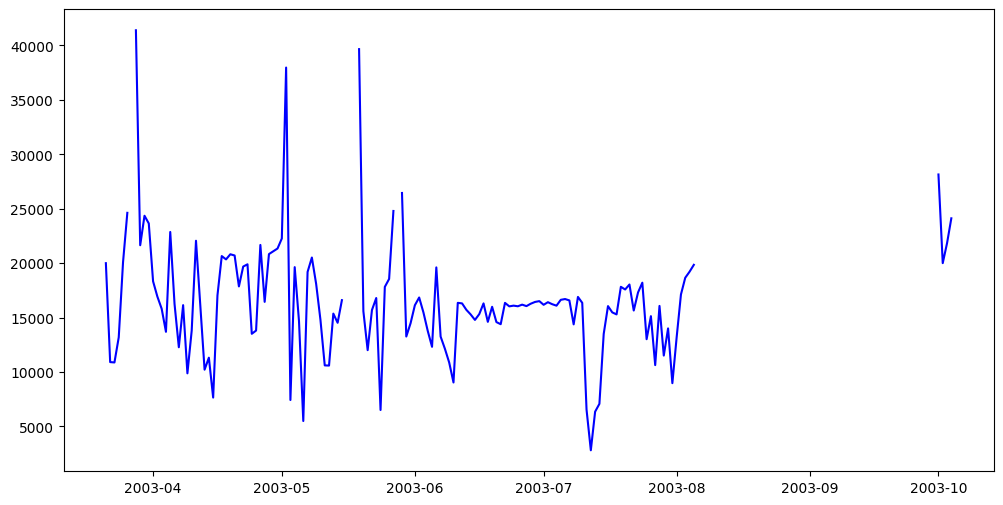

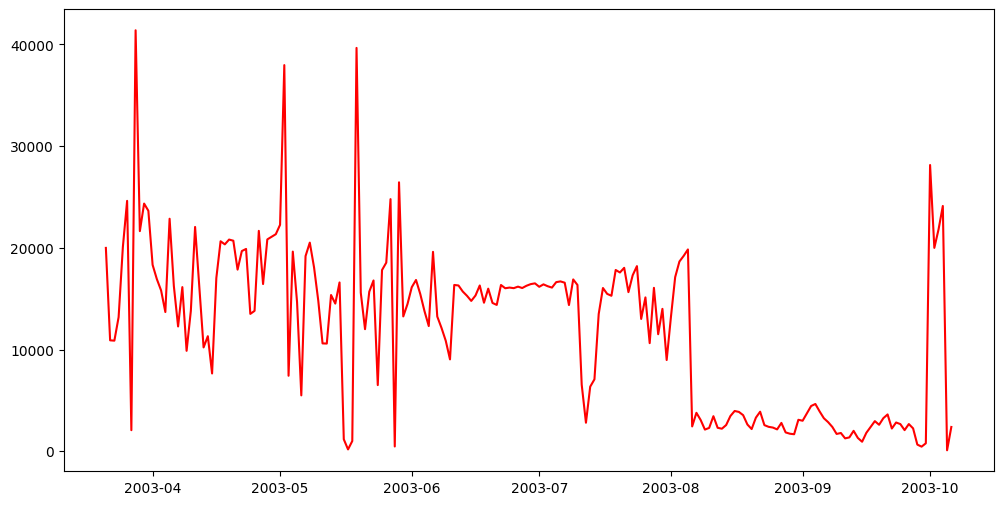

In [81]:
range_plot = 200

plt.figure(figsize=(12, 6))
plt.plot(data['RADIATION'][0:range_plot], color='blue', label='real')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data['RADIATION_interp'][0:range_plot], color='red', label='incompleto')
plt.show()